# Jupyter notebook for loading data FROM IPCCAT2018

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/cheim/Documents/Work/DataSets/IPCCAT training&Test2018/FR/'

entry="FR1706257	G01T0001164000	A61B0006000000	G01T0001290000	A61B0006030000	H01L0027146000	"
entry = entry.split("\t")[:-1]
for i in range(len(entry)-1):
    entry [i+1] = entry[i+1][:4]
print(entry)

['FR1706257', 'G01T', 'A61B', 'G01T', 'A61B', 'H01L']


In [2]:
def createDataFrameLabel(File, NumberOfLabels, CIBsize):
    with open(os.path.join('C:/Users/cheim/Documents/Work/DataSets/IPCCAT training&Test2018/FR', File), 'r') as text:
        data=[]
        for line in text:
            line = line.rstrip("\n")[:-1]
            entry = line.split("\t")
            
            # CIBsize
            for i in range(len(entry)-1):
                entry[i+1] = entry[i+1][:CIBsize]
                
            #We truncate the data_frame to NumberOflabels labels
            if len(entry) > NumberOfLabels+1:
                entry = entry[:NumberOfLabels+1]
            else:
                while len(entry)<NumberOfLabels+1:
                    entry.append('None')
            data.append(tuple(entry))
            
    columns=['Patent_number'] 
    i = 1   
    while i <= NumberOfLabels:
        columns.append('CIB_{}'.format(i))
        i+=1
        
    df = pd.DataFrame(data = data, columns = columns)
    return(df)

df_testLabel = createDataFrameLabel('FR.clean.2.test.cat', 2 , 4 )
df_trainLabel = createDataFrameLabel('FR.clean.98.train.cat', 2 , 4 )

In [3]:
def createDataFrameText(File):
    with open(os.path.join('C:/Users/cheim/Documents/Work/DataSets/IPCCAT training&Test2018/FR',File), 'r', encoding='utf8') as text:
        data=[]
        i=0
        for line in text:
            if i%2==0:
                tup = [] #tuple (Patent_ID, Text)
                element= re.sub(r'[#, \n]', "", line)
            else:
                element = line.lstrip()
                element= re.sub(r'[\n]', "", line)
            
            tup.append(element)
            if len(tup)==2:
                data.append(tuple(tup))
            i+=1
        
        df = pd.DataFrame(data = data , columns = ['Patent_number', 'text'])
        
        return(df)
  
df_testText = createDataFrameText('FR.clean.2.test.mflf')
df_trainText = createDataFrameText('FR.clean.98.train.mflf')

In [4]:
df_test = pd.merge(df_testLabel, df_testText , how='inner', on='Patent_number')
df_train = pd.merge(df_trainLabel, df_trainText , how='inner', on='Patent_number')

In [5]:
print("Test label :")
print(df_testLabel.head())

print("Test text:")
print(df_testText.head())

print("Inner join:")
print(df_test.head())


Test label :
  Patent_number CIB_1 CIB_2
0     FR1706257  G01T  A61B
1     FR2011487  C22C  C23C
2     FR3804361  H04L  H04H
3     FR3804376  G05D  G06Q
4      FR508245  H04N  H04N
Test text:
  Patent_number                                               text
0          FR51   COMPOSES DE CARBOSTYRYLE L'invention concerne...
1          FR91   DERIVES DE 1-PHENOXY (PHENYLTHIO)-4-ARYLAL-KY...
2         FR118   PROCEDE POUR LA PREPARATION D'OLEFINES EN C2 ...
3         FR149   NOUVEAUX DERIVES DE LA DESOXYURIDINE LEUR PRE...
4         FR204   APPAREIL D'USINAGE AUTOMATISE COMPRENANT DES ...
Inner join:
  Patent_number CIB_1 CIB_2                                               text
0     FR1706257  G01T  A61B   TOMODENSITOMÈTRE À RÉSOLUTION VARIABLE ET À C...
1     FR2011487  C22C  C23C   MATÉRIAU COMPOSITE Matériau composite (1) com...
2     FR3804361  H04L  H04H   DISTRIBUTION EN INTÉRIEUR D'UN SIGNAL À LARGE...
3     FR3804376  G05D  G06Q   SYSTÈME DE DRONE DISTRIBUÉ ET DRONE Pour perm...

In [6]:
print("There are {} patents for testing".format(len(df_testLabel)))
print("Number of class represented in test Data for CIB_1 only :{}".format(df_test['CIB_1'].nunique()))

There are 93103 patents for testing
Number of class represented in test Data for CIB_1 only :616


In [7]:
print("Train label :")
print(df_trainLabel.head())

print("Train text:")
print(df_trainText.head())

print("Inner join:")
print(df_train.head())


Train label :
  Patent_number CIB_1 CIB_2
0     FR1706228  G06F  G06F
1     FR1706229  G01N  None
2      FR440980  H05B  None
3      FR440981  G06F  H05K
4      FR440982  B05D  B05C
Train text:
  Patent_number                                               text
0           FR0   PROCEDE ET DISPOSITIF POUR OBTENIR UNE COMBUS...
1           FR1   PROJECTILE PERFORANT ET DE RUPTURE. Le projec...
2           FR2   GENERATEUR LASER A FLUX GAZEUX Générateur las...
3           FR3   CARTOUCHE POUR LA DISPERSION DE LEURRES ELECT...
4           FR4   COMPOSITIONS LUMINEUSES POUR PROJECTILES TRAC...
Inner join:
  Patent_number CIB_1 CIB_2                                               text
0     FR1706228  G06F  G06F   CREATION ET GESTION DE TRANSFORMATIONS DE VER...
1     FR1706229  G01N  None   dispositif d'etalonnage pour ethylometre L'in...
2      FR440980  H05B  None   CIRCUIT POUR EXCITER UNE INSTALLATION DE LAMP...
3      FR440981  G06F  H05K   CONNEXIONS POUR DES PLAQUETTES A CIRCUITS IMP.

In [8]:
print("There are {} patents for train".format(len(df_trainLabel)))
print("Number of class represented in training Data for CIB_1 only :{}".format(df_train['CIB_1'].nunique()))



There are 4562049 patents for train
Number of class represented in training Data for CIB_1 only :633


In [17]:
def convertLabelsDict():
    CIBtoLabel={}
    id=0
    for entry in df_train['CIB_1']:
        if entry not in CIBtoLabel:
            CIBtoLabel[entry]=id
            id+=1
    for entry in df_test['CIB_1']:
        if entry not in CIBtoLabel:
            CIBtoLabel[entry]=id
            id+=1
    return(CIBtoLabel)

In [17]:
'''import pickle
with open (os.path.join(path, 'df_test.pickle') , 'wb') as save:
    pickle.dump( df_test , save)

with open (os.path.join(path, 'df_train.pickle') , 'wb') as save:
    pickle.dump( df_train , save)'''

    

### Répartition des données

On remarque que une certaine classe est sur-représentée. 

Il va valoir normaliser les donner.
- On va donc tronquer vers 25 000.
- Garder uniquement les 500 classes les plus représentées dans un premier temps. On avisera ensuite face aux matrices de confusion

In [9]:
circ_df=df_train['CIB_1'].value_counts()
circ_df = circ_df[circ_df > 5]
circ_df = pd.DataFrame({'CIB_1' : circ_df.index, 'Count' : circ_df.values}).reset_index()
to_plot = circ_df[:100]
info = circ_df[:550]
print("Nombre de classe total dans les données {} \n ".format( len(circ_df)))
print(' A partir de quand les classes ne sont plus suffisamment representées')
print(info.tail())

Nombre de classe total dans les données 632 
 
 A partir de quand les classes ne sont plus suffisamment representées
     index CIB_1  Count
545    545  F24S    339
546    546  B61H    338
547    547  B27F    337
548    548  D04C    326
549    549  G10G    323


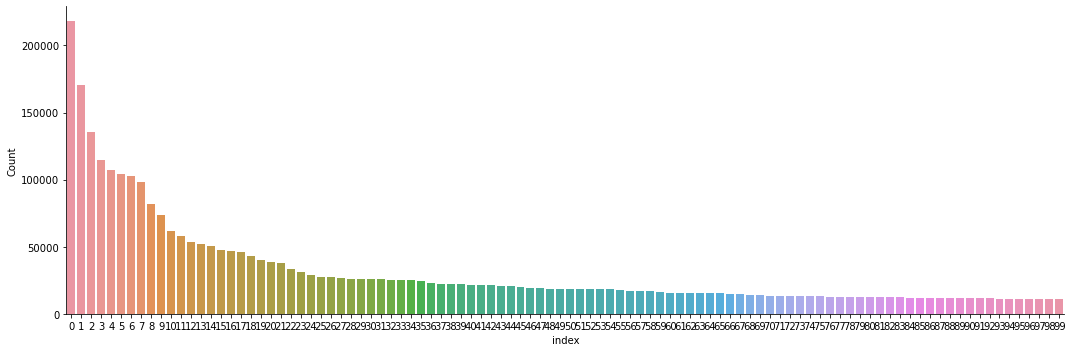

In [10]:

sns.catplot( x='index', y='Count', kind="bar",data= to_plot, height= 5, aspect=3)

### Normalisation

- On ne va garder que les classes avec plus de 1000 patents
- On va garder maximum 50 000 brevets par classe


In [11]:
count_df = df_train['CIB_1'].value_counts()
#count_df = pd.DataFrame({'CIB_1' : count_df.index, 'count' : count_df.values})
print(count_df)
## DataFrame of the classes with less than 1000 patents
trimming_list = list(count_df[count_df < 1000].index)
print(trimming_list)

## DataFrame of the classes with more than 50 000 patents
upper_list = list(count_df[count_df > 50000].index)
print(upper_list)


A61K    218183
G06F    170234
H04L    135559
H01L    114303
A61B    107251
         ...  
F24V        12
F21H        10
C10H         8
G21J         8
G06D         1
Name: CIB_1, Length: 633, dtype: int64
['A63G', 'A24C', 'B27N', 'F41B', 'B09C', 'F02G', 'F23L', 'F16N', 'B43L', 'B03B', 'A41C', 'D21G', 'F04F', 'H03J', 'D03C', 'B62H', 'B44D', 'B21F', 'B25G', 'B04C', 'B21K', 'B27K', 'C05G', 'B41C', 'B03D', 'C23G', 'G04C', 'F17D', 'C12C', 'B41N', 'B31F', 'A22B', 'G07G', 'B28C', 'A43D', 'E05G', 'F41C', 'F42D', 'H01K', 'F41J', 'G04F', 'B63G', 'C10K', 'C09G', 'A47H', 'C01D', 'C08C', 'B60M', 'D21D', 'G01W', 'B61C', 'F23K', 'B44F', 'A46D', 'D06C', 'A41F', 'G21B', 'B31D', 'C13B', 'A41G', 'D21B', 'C14C', 'B23F', 'F16P', 'G06G', 'E21F', 'H04K', 'B64B', 'H03C', 'B27L', 'C25F', 'F21L', 'G21D', 'C05D', 'A41H', 'F28G', 'G21G', 'C13K', 'B27G', 'B27M', 'B61G', 'B43M', 'C01C', 'D06L', 'G03D', 'C12H', 'B21H', 'G06M', 'B42C', 'F23M', 'D05C', 'B44B', 'B61K', 'C05C', 'B41K', 'D02J', 'F03C', 'A63D', 'F15D', 'B6

In [12]:
## Dropping rows that belong to the less represented classes
df_train = df_train[~df_train['CIB_1'].isin(trimming_list)]

In [13]:
## Keeping maximum 50 000 patents per class
df_train = df_train.groupby('CIB_1').tail(50000)


In [14]:
##Check
count_df = df_train['CIB_1'].value_counts()
print(count_df.tail(), count_df.head())

A61D    1032
C11C    1030
A62D    1020
F23J    1018
D06N    1004
Name: CIB_1, dtype: int64 A61K    50000
G06Q    50000
B65D    50000
C12N    50000
C07D    50000
Name: CIB_1, dtype: int64


In [15]:
print("Number of class represented in training Data for CIB_1 only :{}".format(df_train['CIB_1'].nunique()))
print("There are {} patents for training".format(len(df_train)))

Number of class represented in training Data for CIB_1 only :435
There are 3751492 patents for training


## Removing classes from test data

In [16]:
l_train = list(df_train['CIB_1'].unique())

In [17]:
df_test = df_test[df_test['CIB_1'].isin(l_train)]

In [18]:
print("There are {} patents for testing".format(len(df_test)))
print("Number of class represented in test Data for CIB_1 only :{}".format(df_test['CIB_1'].nunique()))

There are 91519 patents for testing
Number of class represented in test Data for CIB_1 only :435


## Stop-Words Analysis

In [20]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer_words = CountVectorizer (input= 'content',
                                   analyzer = 'word',
                                   lowercase=True
                                   )

In [22]:
vector = vectorizer_words.fit_transform(text)

In [23]:
print(vector.shape)
words = np.array(vectorizer_words.get_feature_names())
print(words.shape)

(3751492, 628453)
(628453,)


In [24]:
count_words = np.array( np.sum(vector, axis=0))
count_words = np.squeeze ( count_words)
print(count_words.shape)

(628453,)


In [25]:
a = count_words.argsort()[::-1]

In [85]:
## Dataframe of High Frequency word
df_hf_words = pd.DataFrame({'words': words[a][:400], 'count' : count_words[a][:400]})
print(df_hf_words.head())

  words     count
0    de  44586026
1    un  19898592
2    la  14776406
3    et  14695149
4   une  14329350


In [116]:
stop_words = pd.read_csv('Embeddings/Stop_words.txt', delimiter ='\n')
stop_words.columns=['words']
print(stop_words.head())


   words
0     Ã 
1      À
2  abord
3   afin
4     ah


C:\Users\cheim\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


IndexError: index 5 is out of bounds for axis 0 with size 5

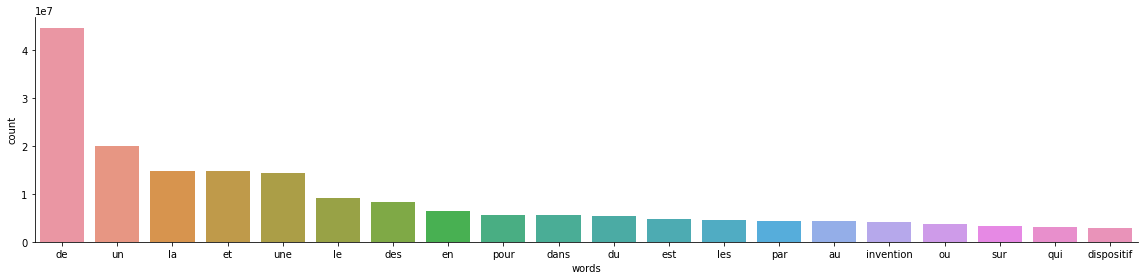

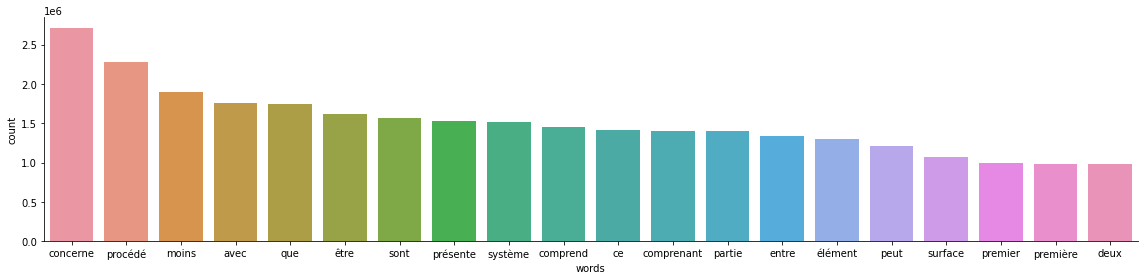

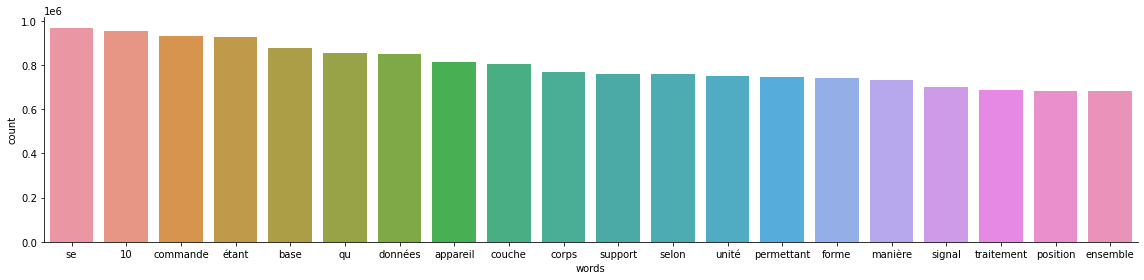

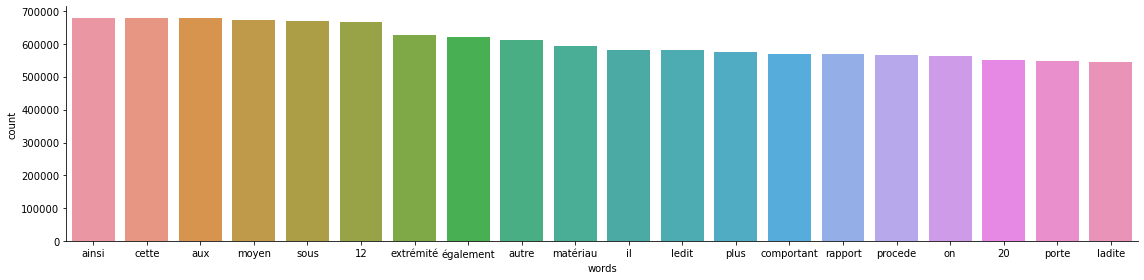

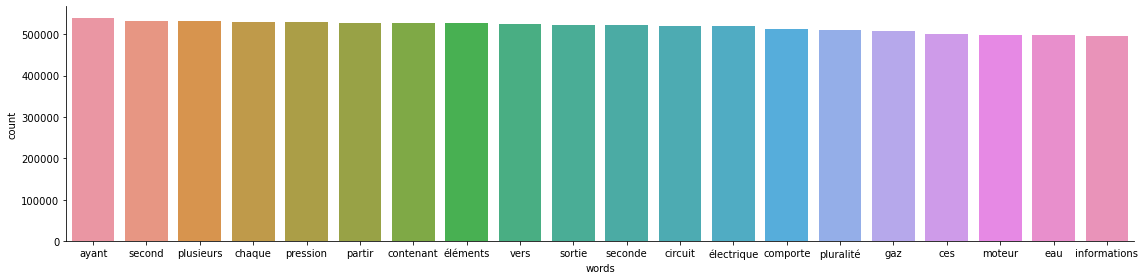

In [97]:

## Let's plot the data !
for k,t in enumerate([20,40,60,80,100,120,140]):
    to_plot2 = pd.DataFrame({'words': words[a][t-20:t], 'count' : count_words[a][t-20:t]})
    
    sns.catplot( x="words", y='count', kind="bar",data= to_plot2, height= 4, aspect=4, ax= axs[k])


In [ ]:
## Removing stop_words from the data frame in order to plot the same graphs
df_hf_words = df_hf_words[~df_hf_words['words'].isin(stop_words['words'])]
print(df_hf_words.head())

C:\Users\cheim\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


IndexError: index 5 is out of bounds for axis 0 with size 5

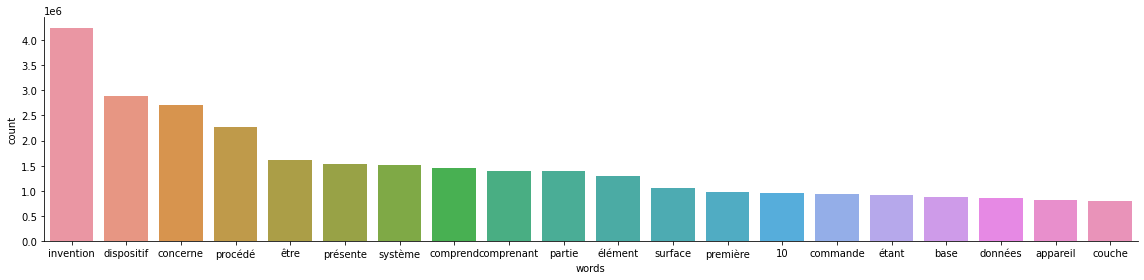

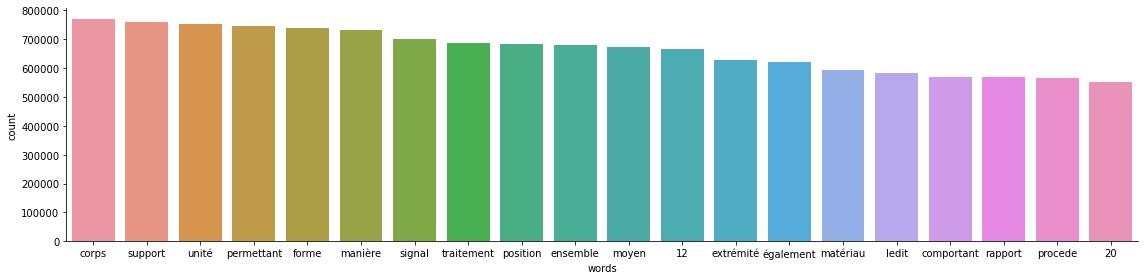

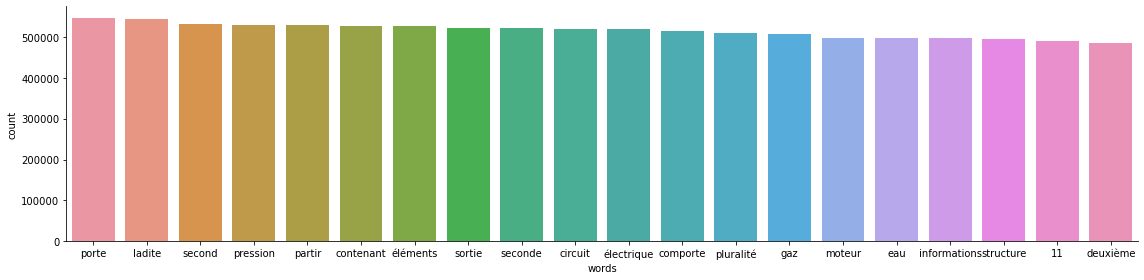

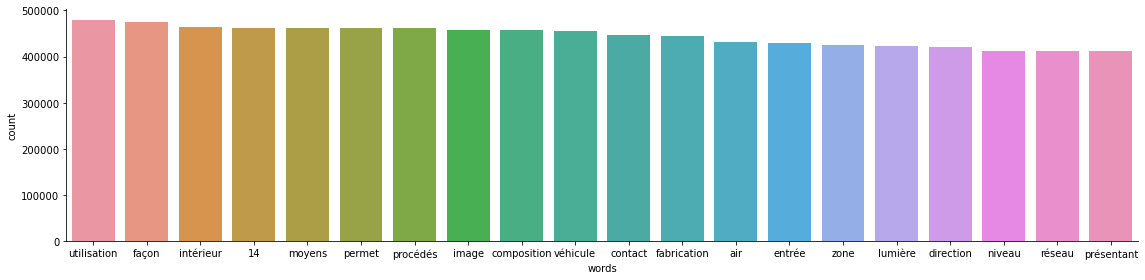

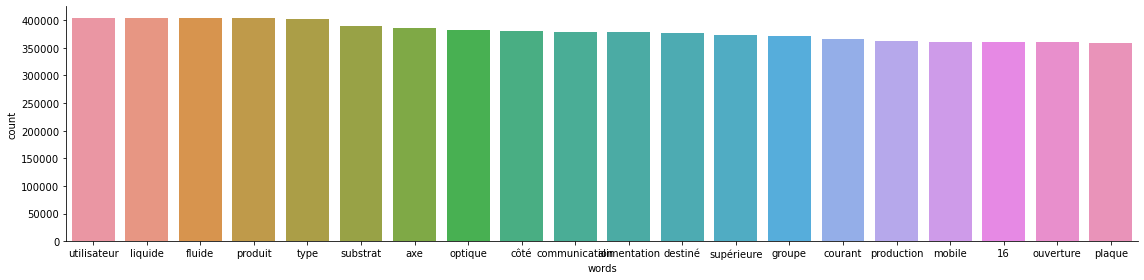

In [89]:
for k,t in enumerate([20,40,60,80,100,120,140]):
    to_plot2 = df_hf_words.iloc[t-20:t]
    sns.catplot( x="words", y='count', kind="bar",data= to_plot2, height= 4, aspect=4, ax= axs[k])

In [108]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df_hf_words.iloc[100:200])
pd.reset_option()


              words   count
151         tension  352923
152         énergie  352646
153              30  348304
154         chambre  347682
155        fonction  346781
156     température  346297
157     réalisation  344704
161         section  335995
162        rotation  334563
163       détection  333756
165          source  330370
166         liaison  329676
167     application  329010
168      inférieure  327902
169    transmission  327400
170           sorte  326607
171              13  324540
172          mesure  321749
173         boîtier  320265
174         interne  320231
175          module  319665
176              22  316491
177          charge  315467
178            mode  314629
180           paroi  310950
181         pouvant  306548
183           objet  303618
185            état  302483
186        fixation  302093
188           bande  300667
189         signaux  298924
190       affichage  296473
191             fil  296208
192            mise  293261
193       notamment 

TypeError: _reset_option() missing 1 required positional argument: 'pat'

In [117]:
to_add=['manière', 'ledit', '20', '12', 'seconde', '11', 'deuxième', '14', '30', '13', '22', 'pouvant', 'notamment', '15', '18', 'dudit', 'même', '100','21']
df_to_add= pd.DataFrame({'words' : to_add})
stop_words.append(df_to_add)
stop_words.drop_duplicates(subset='words')
stop_words.reset_index(drop=True)


,words
0,Ã
1,À
2,abord
3,afin
4,ah
5,ai
6,aie
7,ainsi
8,allaient
9,allo


In [118]:
stop_words.to_csv(path_or_buf='./Embeddings/stop_words.csv', index=False)

In [130]:
def filter_stop_words(sentence):
    sentence = sentence.lower()
    new_sentence = [word for word in sentence.split() if word not in stop_words['words']]
    new_sentence = ' '.join(new_sentence)
    return(new_sentence)

#Exemple
sent = 'Je ne suis pas du quartier OK INTÉRIEUR'
print(filter_stop_words(sent))


je ne suis pas du quartier ok intérieur


In [131]:
## Lets apply that to the whole training set:*
df_train['text'] = df_train['text'].apply(filter_stop_words)

In [132]:
import pickle
path = 'C:/Users/cheim/Documents/Work/DataSets/IPCCAT training&Test2018/FR/'
with open (os.path.join(path, 'df_train_clean.pickle') , 'wb') as save:
    pickle.dump( df_train , save)

In [133]:
df_test['text'] = df_test['text'].apply(filter_stop_words)

In [135]:
with open (os.path.join(path, 'df_test_clean.pickle') , 'wb') as save:
    pickle.dump( df_test , save)

In [136]:
print(df_test['text'].head())

0    tomodensitomètre à résolution variable et à ca...
1    matériau composite matériau composite (1) comp...
2    distribution en intérieur d'un signal à large ...
3    système de drone distribué et drone pour perme...
4    procede d'imagerie ameliore destine a des mati...
Name: text, dtype: object


In [ ]:
Coucou Mon coeur, 
Tu veux essayer ? boujonr bebe t beau